# Seafood Project
## Data Cleaning

In [1]:
import pandas as pd # data manipulation
import spacy # nlp library

nlp = spacy.load('seafood_model_final') # load in NER model, see results below

sf = pd.read_csv('data/dflabeledtranslated_edited.csv') # load in translated data

sf.head() # view first five rows

ModuleNotFoundError: No module named 'spacy'

*Results from training on 553 examples:*

|Label    |  Precision |  Recall  | F-Score
| --------  | --------- |  ------  | ------- |
LOCATION   |   73.913 |  77.273  |  75.556
SEAFOOD     |  90.244  | 82.222   | 86.047
METHOD      | 100.000  | 84.615   | 91.667
SIDE        |  76.471  | 59.091  |  66.667

In [2]:
sf = sf[sf['seafood_yn'] == 1] # get only seafood entries

sf = sf.set_index('id') # reset the index to existing

sf.drop(['name', 'description', 'seafood_yn'], axis=1, inplace=True) # drop un-needed cols

sf.head() # preview data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText
id,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup)
11,157,157,1893,1937,0.25,60.0,Clear green turtle
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere"
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style
17,505,534,1880,1987,0.00,75.0,Caviar


In [3]:
def ent_extract(text):
    doc = nlp(text) # perform nlp on text
    ent_dict = {} # create dictionary to hold entities
    for ent in doc.ents: # for every found entitity
        ent_dict[ent.text.lower()] = ent.label_ # record entity and entity label
    return ent_dict # return all entities found in text

sf['entities'] = sf['translatedText'].apply(ent_extract) # apply new function to data and save in column

sf.head() # preview data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities
id,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'}
11,157,157,1893,1937,0.25,60.0,Clear green turtle,{}
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'}
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'}
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'}


In [4]:
sf = sf[sf['entities'] != {}] # return df when entities isn't empty
sf.head() # view the data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities
id,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'}
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'}
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'}
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'}
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'}


In [5]:
sf['entity_count'] = sf['entities'].apply(lambda x: len(x)) # add number of entities per row
sf.head() # view results

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count
id,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1


In [6]:
sf['seafood'] = None # initialize empty seafood col
sf['method'] = None # same for method
sf.head() # view results

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method
id,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,None,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,None,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,None,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,None,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,None,None


In [7]:
def seafood_col(ent_dict): # takes an entity dictionary as argument
    for key, value in ent_dict.items(): # for each key and value pair
        if value == 'SEAFOOD': # if label is seafood
            return key # return the entity

def method_col(ent_dict): # takes an entity dictionary as argument
    for key, value in ent_dict.items(): # for each key and value pair
        if value == 'METHOD': # if label is method
            return key # return the entity

sf['seafood'] = sf['entities'].apply(seafood_col) # fill seafood column with entities from function
sf['method'] = sf['entities'].apply(method_col) # same for entities
sf.head() # view results

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method
id,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,clam,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,striped bass,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,lobsters,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,caviar,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,sardines,None


In [8]:
from nltk.stem import PorterStemmer # import stemmer module
ps = PorterStemmer() # create a stemmer object
# source for stemmer: https://stackoverflow.com/questions/24647400/what-is-the-best-stemming-method-in-python
sf['stem_seafood'] = sf['seafood'].apply(lambda x: ps.stem(x) if x else None) # create a column to stem seafood items
sf['stem_method'] = sf['method'].apply(lambda x: ps.stem(x) if x else None) # same for methods
sf.head() # view new df

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method,stem_seafood,stem_method
id,,,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,clam,None,clam,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,striped bass,None,striped bass,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,lobsters,None,lobster,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,caviar,None,caviar,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,sardines,None,sardin,None


In [9]:
sf['stem_method'].unique() # view unique methods

array([None, 'plank', 'broil', 'kipper', 'bake', 'salt codfish,', 'fri',
       'findon', 'boil', 'curri', 'smoke', 'pickl', 'steam', 'stuf',
       'grill', 'devil', 'bropil', 'broth', 'stew', 'hard shell crab',
       'crabs saut', 'neck', 'sand', 'berci', 'cream', 'chicken lobst',
       'bass', 'marin', 'sauté', 'sole fri', 'bouillon',
       'salt codfish cak', 'speckl', 'salt pork', 'scrambl',
       'german soft clam', 'poach', 'sole', 'bay asparagu', 'crack',
       'creme,', 'sauce -', 'creole au', 'milk stew', 'shir', 'salt fish',
       'hash', 'garnish', 'sauce hollandais', 'bred', 'delmonico',
       'striped bass', 'kennebeck', 'stir-fri', 'boston', 'kippur',
       'mill pond', 'german', 'butter', 'newburg includ', 'trout',
       'sauce,', 'dill', 'mix', 'panfri', 'ravioli', 'pack', 'blacken',
       'mustard', 'stew simm', 'maryland', 'salt crust', 'char-gril',
       'sear', 'guacamol'], dtype=object)

In [10]:
def method_normal(method):
    if method != None: # if a method exists, swap out for the below to normalize
        if 'fri' in method:
            return 'fri'
        elif 'salt' in method:
            return 'salt'
        elif 'saut' in method:
            return 'saut'
        elif 'creme' in method:
            return 'cream'
        elif 'stew' in method:
            return 'stew'
        elif 'kippur' in method:
            return 'kipper'
        elif 'gril' in method:
            return 'grill'
        else:
            return method
    else: # otherwise, don't do anything
        pass

sf['stem_method'] = sf['stem_method'].apply(method_normal) # apply function defined above
sf['stem_method'].unique() # review the unique methods

array([None, 'plank', 'broil', 'kipper', 'bake', 'salt', 'fri', 'findon',
       'boil', 'curri', 'smoke', 'pickl', 'steam', 'stuf', 'grill',
       'devil', 'bropil', 'broth', 'stew', 'hard shell crab', 'saut',
       'neck', 'sand', 'berci', 'cream', 'chicken lobst', 'bass', 'marin',
       'bouillon', 'speckl', 'scrambl', 'german soft clam', 'poach',
       'sole', 'bay asparagu', 'crack', 'sauce -', 'creole au', 'shir',
       'hash', 'garnish', 'sauce hollandais', 'bred', 'delmonico',
       'striped bass', 'kennebeck', 'boston', 'mill pond', 'german',
       'butter', 'newburg includ', 'trout', 'sauce,', 'dill', 'mix',
       'ravioli', 'pack', 'blacken', 'mustard', 'maryland', 'sear',
       'guacamol'], dtype=object)

In [11]:
def health_level(method):
    if method != None: # if method is not missing
        if method in ['boil', 'steam', 'poach', 'stew', 'roast', 'saut', 'grill', 'broil', 'bake']:
            return 'healthier' # healthier options
            # source for healthy methods: https://www.verywellfit.com/healthiest-cooking-method-4153101
        elif method in ['fri', 'smoke', 'salt', 'cream', 'butter', 'blacken', 'bred']:
            return 'damaging' # not as healthy or not healthy
            # source for unhealthy methods: https://doctor.ndtv.com/living-healthy/get-rid-of-these-unhealthy-cooking-methods-which-can-make-your-food-toxic-2110173
        else:
            return 'other health level' # other methods found by NER model
    else: # if method is empty
        pass # skip the iteration

sf['health_level'] = sf['stem_method'].apply(health_level) # apply the function defined above
sf.head() # view new data

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method,stem_seafood,stem_method,health_level
id,,,,,,,,,,,,,,
9,14,16,1899,1962,0.15,0.4,Clam broth (cup),{'clam': 'SEAFOOD'},1,clam,None,clam,None,None
12,2,2,1900,1900,0.00,0.0,"Striped bass saute, meuniere",{'striped bass': 'SEAFOOD'},1,striped bass,None,striped bass,None,None
14,4,4,1899,1900,0.00,0.0,Fresh lobsters in every style,{'lobsters': 'SEAFOOD'},1,lobsters,None,lobster,None,None
17,505,534,1880,1987,0.00,75.0,Caviar,{'caviar': 'SEAFOOD'},1,caviar,None,caviar,None,None
18,1425,1484,1856,2928,0.00,50.0,Sardines,{'sardines': 'SEAFOOD'},1,sardines,None,sardin,None,None


In [12]:
def fish_fixer(dish): # creating function to handle variances of fish
    if dish != None: # if dish is not missing, replace with variations below
        if 'cod' in dish:
            return 'cod'
        elif 'blue' in dish:
            return 'bluefish'
        elif 'bass' in dish:
            return 'bass'
        else:
            return dish
    else:
        pass # skip over iteration if dish missing

sf['stem_seafood'] = sf['stem_seafood'].apply(fish_fixer) # apply function to data set

In [13]:
sf_method = sf.dropna() # drop missing rows, mostly dropping no method rows
print(f'Length of data with missing methods:\n{len(sf)}\n\nLength of data with no missing methods:\n{len(sf_method)}') # print lengths

Length of data with missing methods:
3969

Length of data with no missing methods:
1214


## Exploration

### Questions

* Which seafood items tend to be the healthiest by method?
    * How can we determine what is healthy and what is not?
* Can we foresee how a seafood will be prepared?
* What is the most common seafood menu items?
* What are the most common seafood cooking methods?

### Plotting

In [14]:
import matplotlib.pyplot as plt # plotting library
import matplotlib.style as style # style wrappers
style.use('fivethirtyeight') # style used by Nate Silver's FiveThirtyEight
import seaborn as sns # wrapper for nicer plots

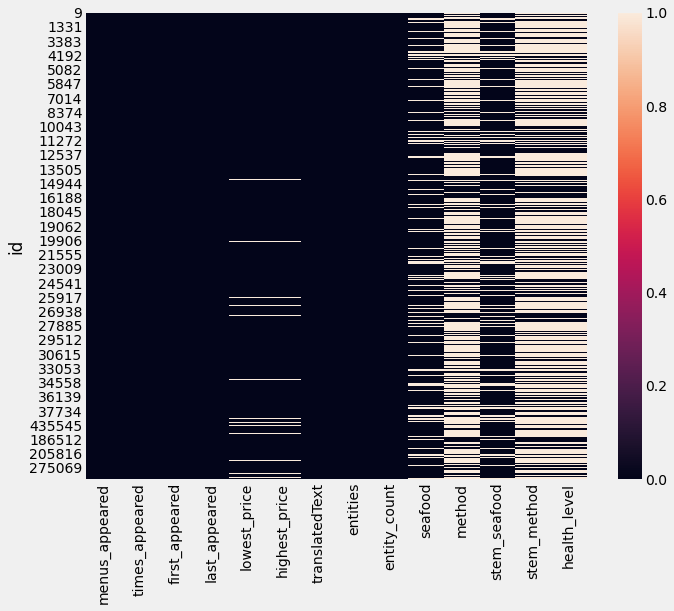

In [15]:
plt.figure(figsize=(10,8)) # set the figure size
sns.heatmap(sf.isna()); # viewing missing values

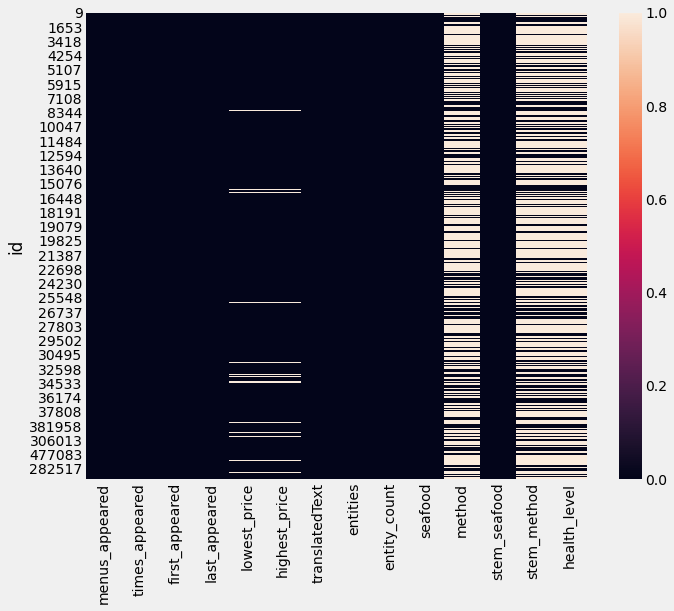

In [16]:
sf = sf.dropna(subset=['stem_seafood']) # dropping rows where seafood is missing
plt.figure(figsize=(10,8)) # set the figure size
sns.heatmap(sf.isna()); # reviewing df after dropping

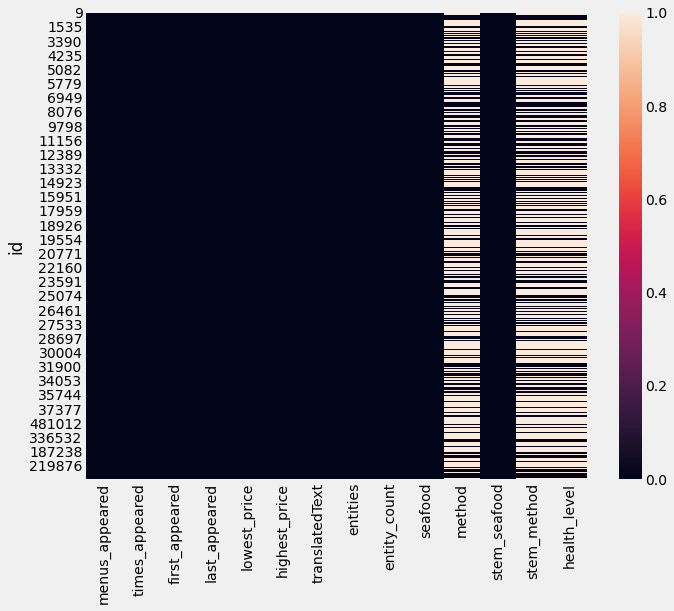

In [17]:
sf = sf.dropna(subset=['lowest_price', 'highest_price']) # dropping rows where price info is missing
plt.figure(figsize=(10,8)) # set the figure size
sns.heatmap(sf.isna()); # reviewing df after dropping

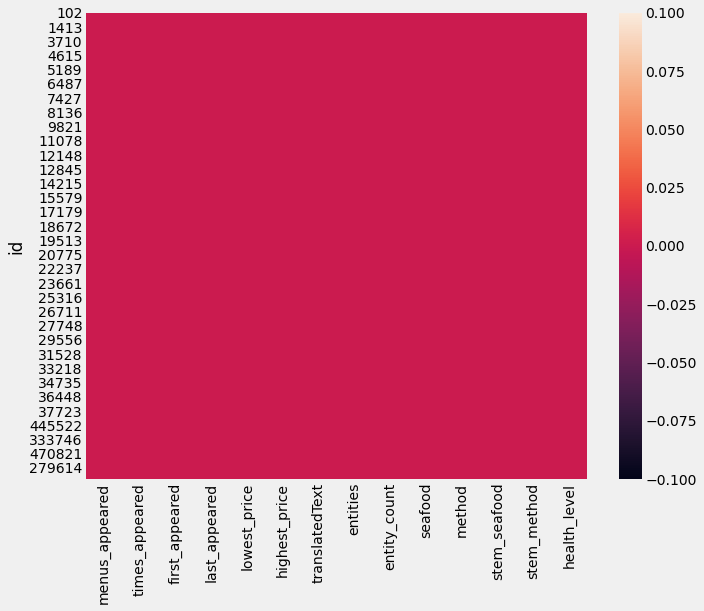

In [18]:
plt.figure(figsize=(10,8)) # set figure size
sns.heatmap(sf_method.isna()); # verify lack of missing values from methods only data set

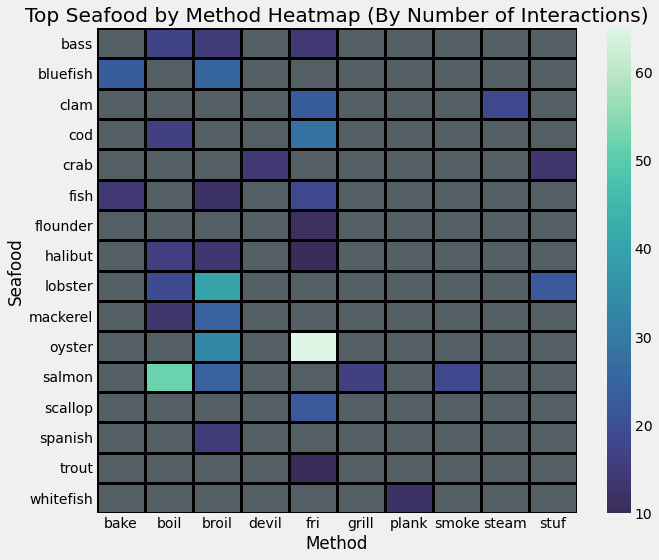

In [19]:
counts = sf_method.groupby(['stem_seafood', 'stem_method'], as_index=False).count()[['stem_seafood', 'stem_method', 'entities']].sort_values('entities', ascending=False) # count how many times seafood is paired with each method
counts_ge10 = counts[counts['entities'] >= 10] # filter to anytime there are more than nine interactions

counts_plot = counts_ge10.pivot_table(values='entities', index='stem_seafood', columns='stem_method') # create df for plotting
plt.figure(figsize=(10,8)) # set the size of the chart
plot = sns.heatmap(counts_plot, linecolor='black', linewidths=3, cmap='mako', center=30) # create the heatmap
plot.set_facecolor('#535F64') # set value for missing data cells
plt.title('Top Seafood by Method Heatmap (By Number of Interactions)') # add title
plt.xlabel('Method') # add x label
plt.ylabel('Seafood'); # add y label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_seafood_by_method_hm.png') # save figure
# source for set_facecolor: https://stackoverflow.com/questions/52399990/change-color-of-missing-values-in-seaborn-heatmap

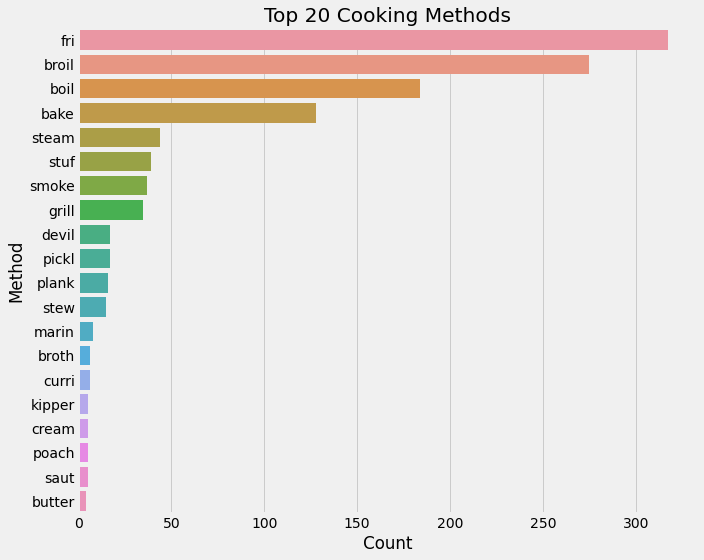

In [20]:
top_20_methods = sf_method['stem_method'].value_counts().iloc[:20] # create data for top 20 plot

plt.figure(figsize=(10,8)) # set the size of the chart
sns.barplot(x=top_20_methods, y=top_20_methods.index) # make the bar plot
plt.title('Top 20 Cooking Methods') # add title
plt.ylabel('Method') # add y label
plt.xlabel('Count'); # add x label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_20_methods.png') # save figure

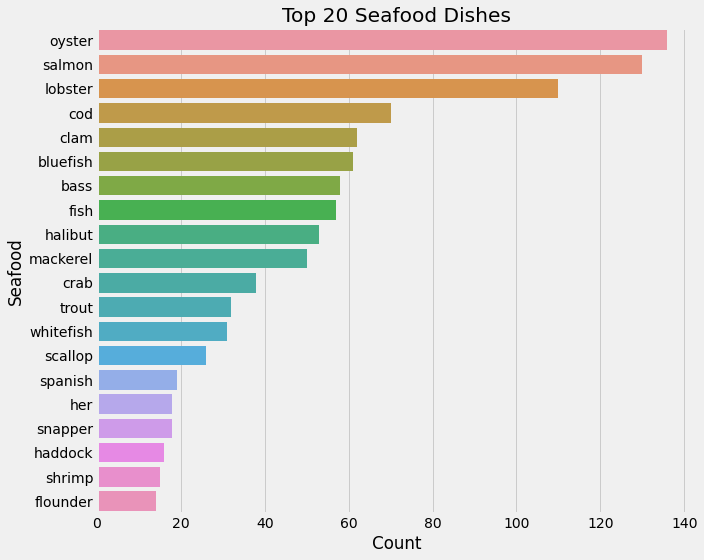

In [21]:
top_20_dishes = sf_method['stem_seafood'].value_counts().iloc[:20] # create data for top 20 plot

plt.figure(figsize=(10,8)) # set the size of the chart
sns.barplot(x=top_20_dishes, y=top_20_dishes.index) # make the bar plot
plt.title('Top 20 Seafood Dishes') # add title
plt.ylabel('Seafood') # add y label
plt.xlabel('Count'); # add x label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_20_seafood.png') # save figure

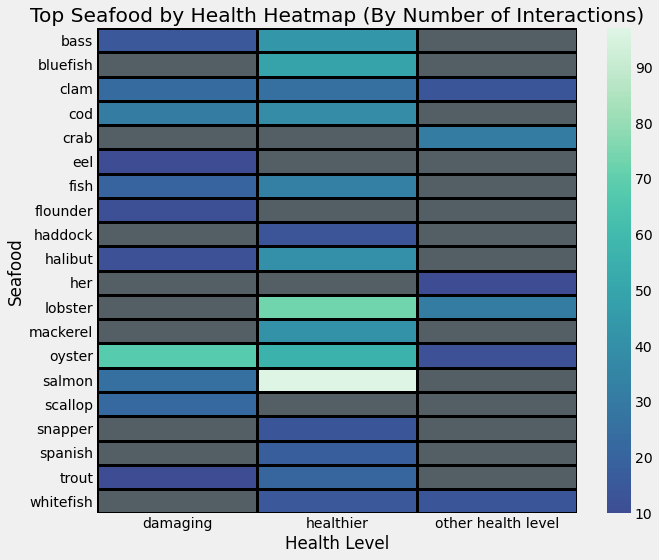

In [22]:
counts = sf.groupby(['stem_seafood', 'health_level'], as_index=False).count()[['stem_seafood', 'health_level', 'entities']].sort_values('entities', ascending=False) # count how many times seafood is paired with each health level
counts_ge10 = counts[counts['entities'] >= 10] # filter to anytime there are more than nine interactions

counts_plot = counts_ge10.pivot_table(values='entities', index='stem_seafood', columns='health_level') # create df for plotting
plt.figure(figsize=(10,8)) # set the size of the chart
plot = sns.heatmap(counts_plot, linecolor='black', linewidths=3, cmap='mako', center=30) # create the heatmap
plot.set_facecolor('#535F64') # set value for missing data cells
plt.title('Top Seafood by Health Heatmap (By Number of Interactions)') # add title
plt.xlabel('Health Level') # add x label
plt.ylabel('Seafood'); # add y label
plt.tight_layout() # formats for saving figure
plt.savefig('plots/top_seafood_by_health_hm.png') # save figure
# source for set_facecolor: https://stackoverflow.com/questions/52399990/change-color-of-missing-values-in-seaborn-heatmap

* Going to use method data for modeling.

### Feature Engineering

In [23]:
sf_method.describe()

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,entity_count
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,8.621087,8.943163,1900.176277,1918.145799,1.005181,3.089498,2.862438
std,28.191076,30.404650,115.665330,84.361308,7.422653,12.603563,0.991317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,1900.000000,1900.000000,0.000000,0.000000,2.000000
50%,2.000000,2.000000,1900.000000,1901.000000,0.200000,0.300000,3.000000
75%,4.000000,4.750000,1901.000000,1919.000000,0.400000,0.650000,3.000000
max,591.000000,638.000000,2928.000000,2928.000000,215.000000,215.000000,11.000000


In [24]:
sf_method = sf_method[(sf_method['first_appeared'] < 2021) & (sf_method['first_appeared'] > 1800)] # removing weird date entries
sf_method = sf_method[(sf_method['last_appeared'] < 2021) & (sf_method['last_appeared'] > 1800)] # same for last appeared entries

In [25]:
# sns.pairplot(sf_method); # view numerical variables in a pairplot

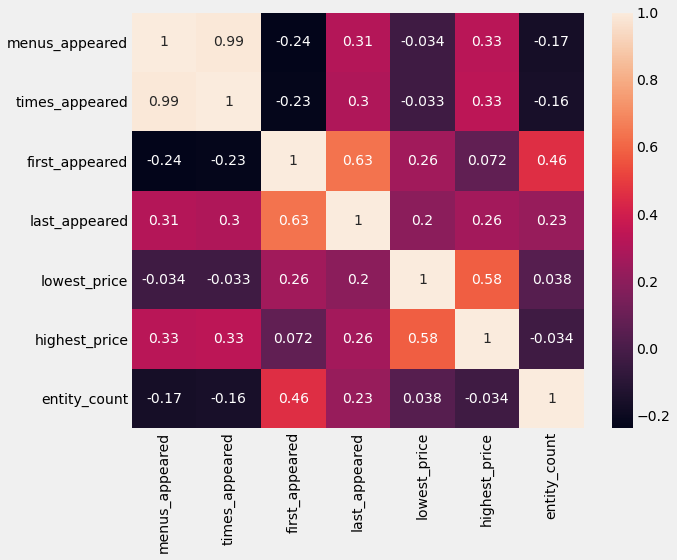

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(sf_method.corr(), annot=True) # create correlation plot
plt.tight_layout()
plt.savefig('plots/corrplot_full.png');

C:\Users\jpzam\Projects\venvs\prodigy\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


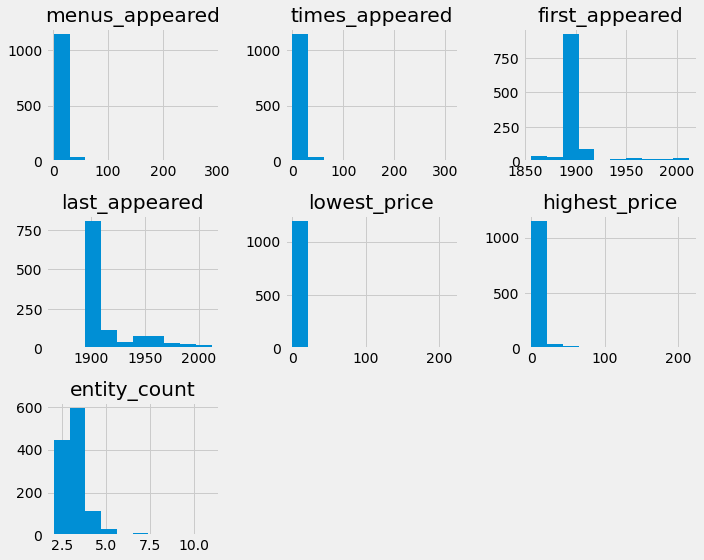

In [27]:
sf_method.hist(figsize=(10,8)) # univariate exploration
plt.tight_layout(); # clean up the plot printing

In [28]:
import numpy as np # linear algebra module

In [29]:
num_cols = sf_method.select_dtypes('number').columns # getting list of numerical columns

In [30]:
sf_method[num_cols].describe()

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,entity_count
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,7.565506,7.837479,1905.623549,1916.224710,1.011020,3.021103,2.864013
std,20.652717,22.495479,24.181078,26.664134,7.446882,12.499063,0.988607
min,1.000000,0.000000,1856.000000,1865.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,1900.000000,1900.000000,0.000000,0.000000,2.000000
50%,2.000000,2.000000,1900.000000,1901.000000,0.200000,0.300000,3.000000
75%,4.000000,4.000000,1901.000000,1918.000000,0.400000,0.600000,3.000000
max,289.000000,311.000000,2012.000000,2012.000000,215.000000,215.000000,11.000000


In [31]:
sf_method['price_dif'] = sf_method['highest_price'] - sf_method['lowest_price'] # making a price difference field
sf_method['appear_dif'] = sf_method['times_appeared'] - sf_method['menus_appeared'] # making menu and total appearance difference field'
sf_method['years_seen'] = sf_method['last_appeared'] - sf_method['first_appeared'] # counting years seen across data set
sf_method.head() # view new fields

,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,translatedText,entities,entity_count,seafood,method,stem_seafood,stem_method,health_level,price_dif,appear_dif,years_seen
id,,,,,,,,,,,,,,,,,
102,41,44,1856,1957,0.30,2.50,Broiled Mackerel,"{'broiled': 'METHOD', 'mackerel': 'SEAFOOD'}",2,mackerel,broiled,mackerel,broil,healthier,2.20,3,101
134,2,2,1900,1900,0.60,0.60,"Baked bluefish, Duxelle","{'baked': 'METHOD', 'bluefish': 'SEAFOOD', 'du...",3,bluefish,baked,bluefish,bake,healthier,0.00,0,0
183,3,3,1901,1901,0.00,0.00,"Salt Codfish, Spanish Style","{'salt codfish,': 'METHOD', 'spanish': 'SEAFOOD'}",2,spanish,"salt codfish,",spanish,salt,damaging,0.00,0,0
191,10,10,1900,1901,0.15,15.00,Fried Flounders,"{'fried': 'METHOD', 'flounders': 'SEAFOOD'}",2,flounders,fried,flounder,fri,damaging,14.85,0,1
194,112,112,1856,1971,0.00,1.75,Fried fish,"{'fried': 'METHOD', 'fish': 'SEAFOOD'}",2,fish,fried,fish,fri,damaging,1.75,0,115


In [32]:
sf_method[['price_dif', 'appear_dif', 'years_seen']].describe()

,price_dif,appear_dif,years_seen
count,1206.000000,1206.000000,1206.000000
mean,2.010083,0.271973,10.601161
std,10.177444,3.817713,21.910477
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.150000,0.000000,7.000000
max,149.450000,128.000000,128.000000


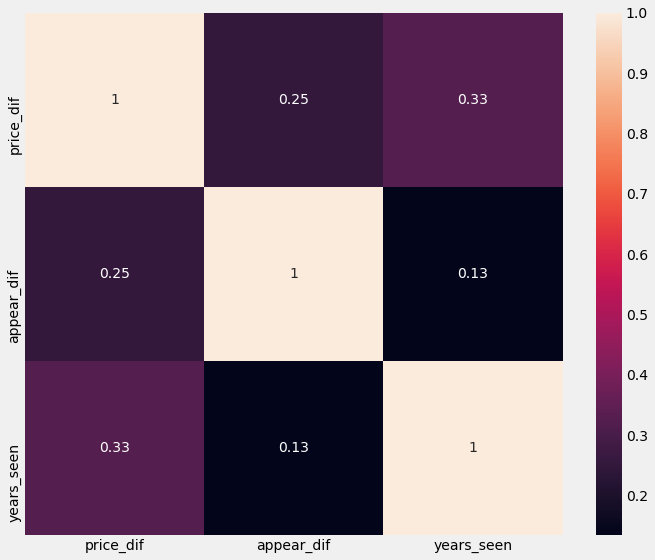

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(sf_method[['price_dif', 'appear_dif', 'years_seen']].corr(), annot=True)
plt.tight_layout()
plt.savefig('plots/corrplot_feats.png');

<Figure size 720x576 with 0 Axes>

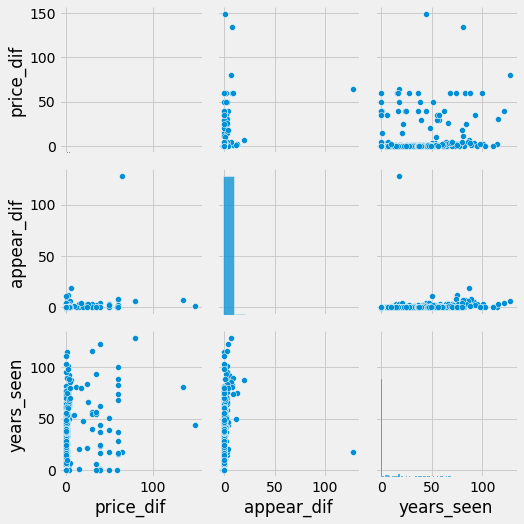

In [34]:
plt.figure(figsize=(10,8))
sns.pairplot(sf_method[['price_dif', 'appear_dif', 'years_seen']])
plt.tight_layout()
plt.savefig('plots/pairplot_feats.png');

In [35]:
sf_method = sf_method[sf_method['health_level'] != 'other health level'] # removing third health class

In [36]:
seafoods = sf_method['stem_seafood'].value_counts().iloc[:33].index # select dishes with more than 4 instances

In [37]:
sf_method = sf_method[sf_method['stem_seafood'].isin(seafoods)] # filtering to data with more than 4 instances

In [38]:
sf_method[['price_dif', 'appear_dif', 'years_seen']].describe()

,price_dif,appear_dif,years_seen
count,964.000000,964.000000,964.000000
mean,2.192334,0.312241,11.262448
std,10.903485,4.219450,22.667597
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.150000,0.000000,8.000000
max,149.450000,128.000000,128.000000


In [39]:
sf_method['over_8_years'] = sf_method['years_seen'].apply(lambda x: 1 if x >= 8 else 0).copy() # creating binary var for if item seen over 8 years
sf_method['price_difference'] = sf_method['price_dif'].apply(lambda x: 1 if x > 0 else 0).copy() # binary var for if there's a difference in price
sf_method['appear_difference'] = sf_method['appear_dif'].apply(lambda x: 1 if x > 0 else 0).copy() # binary var if there's a difference in menus seen and appearance

In [40]:
sf_final = sf_method[['health_level', 'over_8_years', 'price_difference', 'appear_difference', 'stem_seafood', 'stem_method']] # final dataset for modeling

In [41]:
sf_final.head() # view data

,health_level,over_8_years,price_difference,appear_difference,stem_seafood,stem_method
id,,,,,,
102,healthier,1,1,1,mackerel,broil
134,healthier,0,0,0,bluefish,bake
183,damaging,0,0,0,spanish,salt
191,damaging,0,1,0,flounder,fri
194,damaging,1,1,0,fish,fri


In [42]:
for col in sf_final.columns:
    sf_final[col] = sf_final[col].astype('category') # change object columns to categories

<ipython-input-42-58b9999a3360>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_final[col] = sf_final[col].astype('category')


In [43]:
sf_final['health_level'] = sf_final['health_level'].cat.codes.values # convert to values
sf_final.head()

<ipython-input-43-c4c68de9ccfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_final['health_level'] = sf_final['health_level'].cat.codes.values


,health_level,over_8_years,price_difference,appear_difference,stem_seafood,stem_method
id,,,,,,
102,1,1,1,1,mackerel,broil
134,1,0,0,0,bluefish,bake
183,0,0,0,0,spanish,salt
191,0,0,1,0,flounder,fri
194,0,1,1,0,fish,fri


In [45]:
from sklearn.model_selection import train_test_split # for splitting data

In [53]:
from sklearn.linear_model import LogisticRegression # model framework

## Add Calories 
### Adding New Data

In [56]:
cals = pd.read_csv('data/calories.csv')

In [57]:
cals = cals.fillna(method='backfill')

<AxesSubplot:>

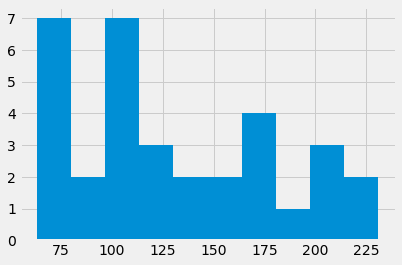

In [58]:
cals['cals_per_serving'].hist()

(array([3., 4., 2., 4., 5., 2., 3., 4., 1., 5.]),
 array([4.14313473, 4.27306302, 4.40299132, 4.53291962, 4.66284792,
        4.79277622, 4.92270452, 5.05263282, 5.18256111, 5.31248941,
        5.44241771]),
 <BarContainer object of 10 artists>)

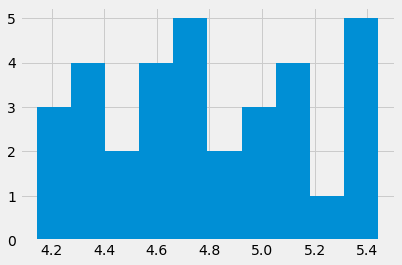

In [59]:
plt.hist(np.log(cals['cals_per_serving']))

In [60]:
cals['log_cals'] = np.log(cals['cals_per_serving'])

In [61]:
cals.head()

,stem_seafood,cals_per_serving,log_cals
0,bass,110.0,4.700480
1,oyster,175.0,5.164786
2,mackerel,231.0,5.442418
3,shrimp,90.0,4.499810
4,scallop,75.0,4.317488


In [62]:
df = pd.merge(df, cals)
df.head()

,health_level,over_8_years,price_difference,appear_difference,stem_seafood,stem_method,cals_per_serving,log_cals
0,1,0,0,0,bass,boil,110.0,4.70048
1,0,0,0,0,bass,fri,110.0,4.70048
2,0,0,0,0,bass,fri,110.0,4.70048
3,1,0,0,0,bass,boil,110.0,4.70048
4,1,0,0,0,bass,boil,110.0,4.70048


In [63]:
df.groupby('health_level')['cals_per_serving'].describe()

,count,mean,std,min,25%,50%,75%,max
health_level,,,,,,,,
0,324.0,129.265432,50.512886,63.0,90.0,120.0,175.0,231.0
1,640.0,139.296875,55.910301,63.0,93.0,137.0,195.0,231.0


<AxesSubplot:xlabel='cals_per_serving', ylabel='Density'>

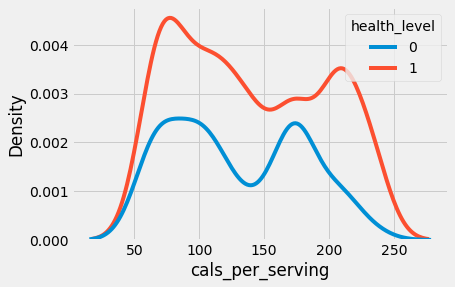

In [64]:
sns.kdeplot(x='cals_per_serving', hue='health_level', data=df)

### Logistic Lasso Regression

In [73]:
df.head()

,health_level,over_8_years,price_difference,appear_difference,stem_seafood,stem_method,cals_per_serving,log_cals,cal_level
0,1,0,0,0,bass,boil,110.0,4.70048,below average raw cal
1,0,0,0,0,bass,fri,110.0,4.70048,below average raw cal
2,0,0,0,0,bass,fri,110.0,4.70048,below average raw cal
3,1,0,0,0,bass,boil,110.0,4.70048,below average raw cal
4,1,0,0,0,bass,boil,110.0,4.70048,below average raw cal


In [75]:
X = df[['over_8_years', 'price_difference', 'appear_difference', 'stem_seafood', 'log_cals']] # select predictors
X = pd.get_dummies(X, columns=['stem_seafood'], prefix='', prefix_sep='')  # onehot encode predictors
y = df['health_level'] # select target var

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data 80:20

In [77]:
c_list = range(1, 101) # list of values to test for lambda
f1s = [] # list to hold f1 scores for plotting
for c in c_list: # for each val in c_list
    model = LogisticRegression(penalty='l1', solver='liblinear', C=c, random_state=1, max_iter=1000) # create a model using value as lambda
    model.fit(X_train, y_train) # fit the model on training data
    preds = model.predict(X_test) # get predictions from test data
    f1s.append(metrics.f1_score(y_test, preds)) # add f1 score to f1 score list

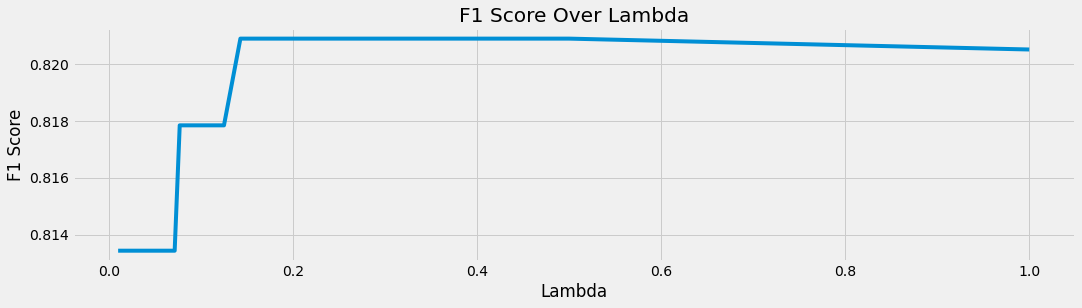

In [78]:
c_array = np.array(c_list) # convert to array for plot
lambdas = 1 / c_array # convert C param to a lambda value
plt.figure(figsize=(16,4))
plt.plot(lambdas, f1s)
plt.ylabel('F1 Score')
plt.xlabel('Lambda')
plt.title('F1 Score Over Lambda')
plt.savefig('plots/f1_lamb_lasso.png')

In [79]:
log_reg_best = LogisticRegression(penalty='l1', solver='liblinear', C=6, random_state=1, max_iter=1000) # fit model with best lambda
log_reg_best.fit(X_train, y_train) # fit the best model
preds = log_reg_best.predict(X_test) # get preds from best model
print(f'Precision: {metrics.precision_score(y_test, preds):2.2f} | Recall: {metrics.recall_score(y_test, preds):2.2f} | F1 Score: {metrics.f1_score(y_test, preds):2.2f} | Accuracy: {metrics.accuracy_score(y_test, preds):2.2%}')

Precision: 0.76 | Recall: 0.89 | F1 Score: 0.82 | Accuracy: 75.13%


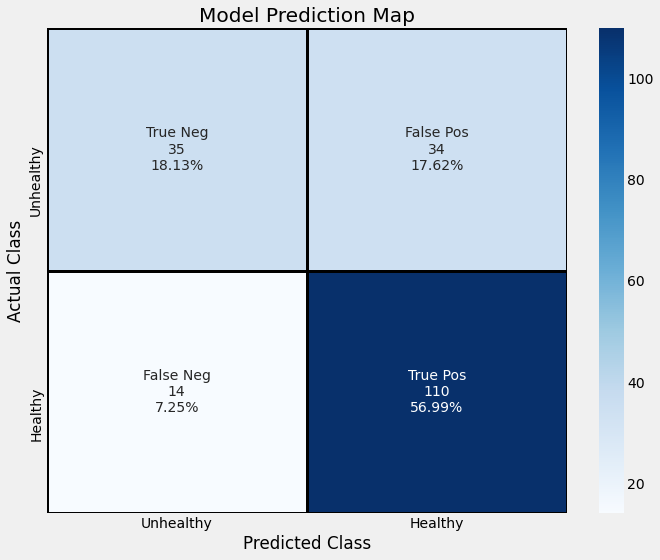

In [86]:
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(10,8))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', linewidths=3, linecolor='black')
plt.title('Model Prediction Map')
plt.xticks([0.5, 1.5], ['Unhealthy', 'Healthy'])
plt.yticks([0.5, 1.5], ['Unhealthy', 'Healthy'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()
plt.savefig('plots/cf_lasso.png')

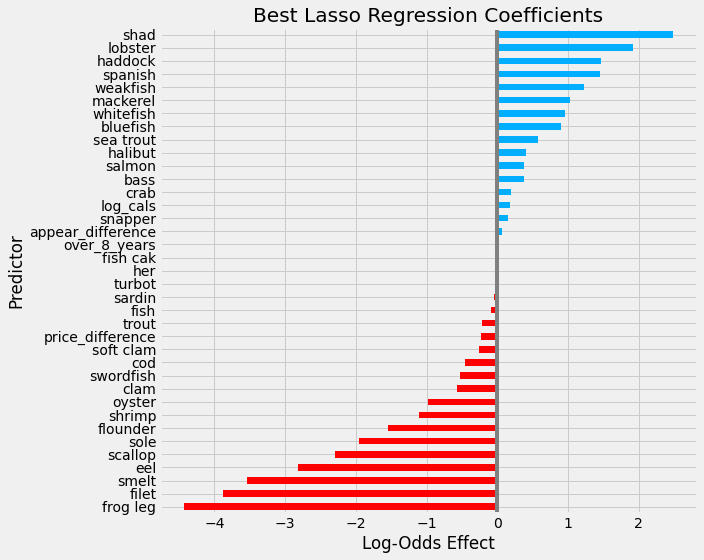

In [81]:
coefs = pd.DataFrame({'predictor': X.columns,
                     'effect': log_reg_best.coef_[0]}) # create df for coefs
coefs = coefs.sort_values(by='effect').set_index('predictor')
color = (coefs['effect'] > 0).apply(lambda x: '#00AEFF' if x else '#FF0000')

coefs['effect'].plot(kind='barh', figsize=(10, 8), color=color)
plt.title('Best Lasso Regression Coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.xlabel('Log-Odds Effect')
plt.ylabel('Predictor')
plt.tight_layout()
plt.savefig('plots/logit_lasso_plot_coefs.png')